<a href="https://colab.research.google.com/github/anafer25/Sentiment-Analysis-on-Movie-Reviews/blob/main/Sentiment_Analysis_on_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5257 - loss: 0.6911 - val_accuracy: 0.6398 - val_loss: 0.6804
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6478 - loss: 0.6753 - val_accuracy: 0.6192 - val_loss: 0.6575
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6998 - loss: 0.6457 - val_accuracy: 0.7834 - val_loss: 0.6068
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7767 - loss: 0.5915 - val_accuracy: 0.7850 - val_loss: 0.5466
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8168 - loss: 0.5264 - val_accuracy: 0.8194 - val_loss: 0.4861
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8255 - loss: 0.4703 - val_accuracy: 0.8192 - val_loss: 0.4422
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8516 - loss: 0.4132 - val_accuracy: 0.8488 - val_loss: 0.3987
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accurac

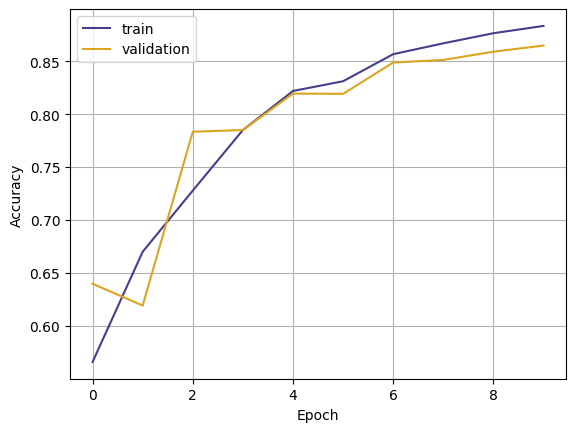

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# load dataset: IMBD movie reviews
# 1 = positive, 0 = negative
( xTrain, yTrain ), ( xTest, yTest ) = tf.keras.datasets.imdb.load_data(num_words=10000)

# pad sequences
xTrain = tf.keras.preprocessing.sequence.pad_sequences(xTrain, maxlen=256)
xTest = tf.keras.preprocessing.sequence.pad_sequences(xTest, maxlen=256)

# build model: turn word IDs into vectors and summarize
model = models.Sequential([
    layers.Input( shape=(256,) ),
    layers.Embedding( input_dim=10000, output_dim=16 ), # 16D embedding
    layers.GlobalAveragePooling1D( ),                   # 1D view
    layers.Dense( 16, activation='relu' ),              # connected layer
    layers.Dense( 1, activation='sigmoid' )             # output neuron representing P(positive | review)
])

# compile
model.compile(
    optimizer = 'adam',                                 # adaptive stochastic gradient descent; stable and fast convergence
    loss = 'binary_crossentropy',                       # negative log-likelihood
    metrics = ['accuracy']                              # threshold-based metric (sigmoid > 0.5 → positive)
)

# train
history = model.fit(
    xTrain,
    yTrain,
    # number of full passes through the training dataset
    epochs = 10,
    # number of samples used per gradient update
    batch_size = 512,
    # hold out 20% of training data for validation
    validation_split = 0.2
)

# evaluate
test_loss, test_acc = model.evaluate( xTest, yTest )
print( "Test accuracy:", test_acc )

# plot accuracy
plt.plot( history.history['accuracy'], label='train', color='darkslateblue' )
plt.plot( history.history['val_accuracy'], label='validation', color='goldenrod' )
plt.xlabel( 'Epoch' )
plt.ylabel( 'Accuracy' )
plt.grid(True)
plt.legend( )
plt.show( )

